In [223]:
import napari
import h5py
from pathlib import Path
from abbott.h5_files import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [224]:
df = pd.read_csv(r"Q:\carspi\ETiX_Output\240304_normalized_per_timepoint.csv")
df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Mean,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.784831,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.923943,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.874962,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.869475,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.833982,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.673715,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.621009,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.608688,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.581448,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687


In [18]:
df= df.drop('Unnamed: 0', axis=1)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


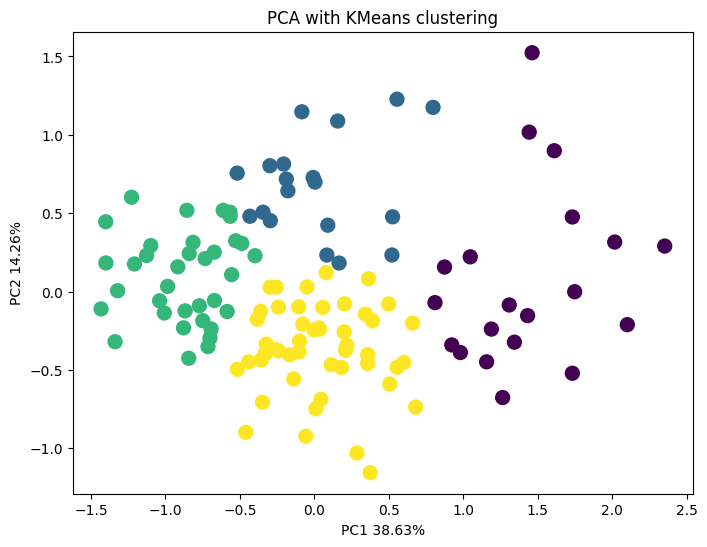

In [32]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from skimage import transform

# Perform UMAP dimensionality reduction

df_last_tp= df[df['timepoint']==22]
df_last_tp= df_last_tp.drop(['embryo ID', 'timepoint'], axis=1)

X = df_last_tp.values

pca = PCA(n_components = 2, random_state=0)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

x = X[:,0]
y = X[:,1]

# Perform K-Means clustering on the UMAP-transformed data
n_clusters = 4 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
cluster_numbers = kmeans.labels_ # Get cluster labels

# Create a scatterplot with different colors for clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=cluster_numbers, cmap='viridis', s=100)

# Set the x and y axis labels
plt.xlabel(f'PC1 {round((explained_variance[0] * 100), 2)}%')
plt.ylabel(f'PC2 {round((explained_variance[1] * 100), 2)}%')


# Show the plot
plt.title('PCA with KMeans clustering')
plt.show()

In [43]:
df

,embryo ID,timepoint,area,axis_major_length,axis_minor_length,area_convex,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,extent,perimeter,solidity,endpoint clusters
0,106,0,0.596134,0.526974,0.610106,0.541092,0.679627,0.375151,0.739608,0.668748,0.620947,0.523495,0.877156,1.0
1,106,1,0.549444,0.532905,0.547085,0.503834,0.619795,0.325526,0.797662,0.626180,0.652439,0.426723,0.918093,1.0
2,106,2,0.558377,0.500731,0.555871,0.508400,0.617561,0.288279,0.741912,0.633592,0.911488,0.476333,0.890987,1.0
3,106,3,0.580525,0.536903,0.563300,0.533073,0.713195,0.329481,0.773618,0.656652,0.808131,0.512933,0.934189,1.0
4,106,4,0.553197,0.559531,0.529939,0.509527,0.747215,0.338796,0.801564,0.636560,0.777605,0.479253,0.986449,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.385100,0.449956,0.345811,0.334724,0.524102,0.737866,0.488586,0.605260,0.353491,0.851830,1.0
2802,99,19,0.376534,0.374596,0.460483,0.331981,0.359129,0.474671,0.716024,0.475751,0.549428,0.345932,0.818456,1.0
2803,99,20,0.370516,0.390699,0.462109,0.329926,0.279032,0.545283,0.630158,0.469473,0.603586,0.350371,0.927823,1.0
2804,99,21,0.366638,0.380523,0.464264,0.324016,0.278816,0.542645,0.666903,0.467365,0.736984,0.351702,0.910478,1.0


In [33]:
#save clusters at final timepoint for y

import pandas as pd

# Create a copy of the dataframe for clustering
final_clusters_df = df.copy()

# Select only the rows where timepoint is 22 and drop unnecessary columns
final_clusters_df = final_clusters_df[final_clusters_df['timepoint']==22]

# Add KMeans labels to the subset dataframe
final_clusters_df['endpoint clusters'] = cluster_numbers

# Merge the clustering results back to the original dataframe based on the index
df = pd.merge(df, final_clusters_df[['endpoint clusters']], left_index=True, right_index=True, how='left')

df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,NaN
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,NaN
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,NaN
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,NaN
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,NaN
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,NaN
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,NaN
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,NaN


In [34]:
#fill NaN values for all timepoints with endpoint cluster for corresponding embryo ID

df['endpoint clusters'] = df.groupby('embryo ID')['endpoint clusters'].fillna(method='ffill').fillna(method='bfill')

df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


In [35]:
#save datarame with endpoint clusters

fld_out = Path(r"Q:\carspi\ETiX_Output")

df.to_csv(fld_out/ "240304_endpoint_clusters.csv")

Compare Machine Learning Models

In [446]:
#load normalized data with ground truth

df = pd.read_csv(r"Q:\carspi\ETiX_Output\240304_endpoint_clusters.csv")
df

,Unnamed: 0,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


In [447]:
df=df.drop('Unnamed: 0', axis=1)
df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,0.668748,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,0.626180,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,0.633592,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,0.656652,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,0.636560,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,0.488586,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,0.475751,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,0.469473,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,0.467365,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


Load selected feature subset

In [362]:
#morphology features
df= df[["embryo ID", "timepoint", "area", "axis_major_length", "axis_minor_length", "area_convex",	"centroid_local-0",	"centroid_local-1",	"eccentricity",	"equivalent_diameter_area",	"extent",	"perimeter", "solidity", 'endpoint clusters']]	


In [372]:
#PFA selection

df= df[['embryo ID', 'timepoint', 
 'area_convex',
 'eccentricity',
 'extent',
 'Haralick.IMC1.Mean',
 'Gradient.Mag.Skewness',
 'Haralick.DifferenceVariance.Mean',
 'Haralick.SumOfSquares.Mean',
 'Haralick.SumOfSquares.Range',
 'Haralick.IMC1.Range',
 'Haralick.SumAverage.Range',
 'Shape.FSD1',
 'Shape.FSD2',
 'Shape.FSD4',
 'Shape.FSD5',
 'Shape.FSD6',
 'endpoint clusters']
]

Plot Accuracy over Timepoints

In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

score_dict = {}
number_timepoints = 23


for tp in range(0,number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp[['endpoint clusters']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
   
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    score_dict[tp] = score  
score_dict

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

{0: 0.5510204081632653,
 1: 0.5306122448979592,
 2: 0.5918367346938775,
 3: 0.673469387755102,
 4: 0.6530612244897959,
 5: 0.673469387755102,
 6: 0.6530612244897959,
 7: 0.6530612244897959,
 8: 0.5918367346938775,
 9: 0.6938775510204082,
 10: 0.6326530612244898,
 11: 0.7142857142857143,
 12: 0.7959183673469388,
 13: 0.8163265306122449,
 14: 0.7755102040816326,
 15: 0.7755102040816326,
 16: 0.7755102040816326,
 17: 0.8163265306122449,
 18: 0.7959183673469388,
 19: 0.7959183673469388,
 20: 0.7959183673469388,
 21: 0.8571428571428571,
 22: 0.8571428571428571}

In [453]:
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 4}

feature_importance_dict = {}
score_dict = {}

for tp in range(0, number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp[['endpoint clusters']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
    # Initialize the XGBClassifier model
    model =   XGBClassifier(**params, n_estimators=100, eta=0.1, max_depth=4)
    # Initialize RFECV
    selector = RFECV(estimator=model, step=1, cv=5)

    # Fit RFECV
    selector = selector.fit(X_train, y_train)

    # Select features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Fit the model with selected features
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    score_dict[tp] = accuracy

    # Collect feature importances
    feature_importances = model.feature_importances_
    feature_names = X.columns[selector.support_]  # Get selected feature names
    feature_importance_dict[tp] = list(zip(feature_names, feature_importances))

score_dict


{0: 0.5510204081632653,
 1: 0.42857142857142855,
 2: 0.6530612244897959,
 3: 0.4897959183673469,
 4: 0.6938775510204082,
 5: 0.6326530612244898,
 6: 0.6530612244897959,
 7: 0.6122448979591837,
 8: 0.6326530612244898,
 9: 0.5918367346938775,
 10: 0.6122448979591837,
 11: 0.6326530612244898,
 12: 0.7346938775510204,
 13: 0.7959183673469388,
 14: 0.6938775510204082,
 15: 0.7755102040816326,
 16: 0.7959183673469388,
 17: 0.8571428571428571,
 18: 0.8367346938775511,
 19: 0.7755102040816326,
 20: 0.8163265306122449,
 21: 0.8775510204081632,
 22: 0.8571428571428571}

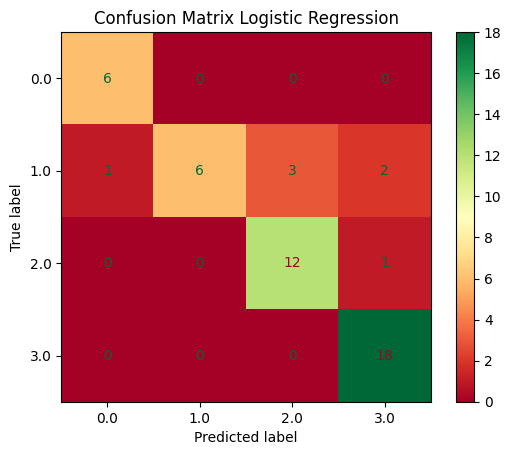

In [439]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
# use the built-in visualization function to generate a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='RdYlGn')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [450]:
score_logreg = score_dict

In [441]:
# loop through all timepoints and decision tree accuracy score to dict

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

score_dict = {}
for tp in range(0,number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop([ 'embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp[['endpoint clusters']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    score_dict[tp] = score
score_dict

{0: 0.5102040816326531,
 1: 0.5102040816326531,
 2: 0.5714285714285714,
 3: 0.5918367346938775,
 4: 0.5306122448979592,
 5: 0.6122448979591837,
 6: 0.5510204081632653,
 7: 0.673469387755102,
 8: 0.5306122448979592,
 9: 0.5918367346938775,
 10: 0.5306122448979592,
 11: 0.5510204081632653,
 12: 0.6938775510204082,
 13: 0.7346938775510204,
 14: 0.673469387755102,
 15: 0.7551020408163265,
 16: 0.7142857142857143,
 17: 0.7346938775510204,
 18: 0.6938775510204082,
 19: 0.7346938775510204,
 20: 0.7346938775510204,
 21: 0.7346938775510204,
 22: 0.7346938775510204}

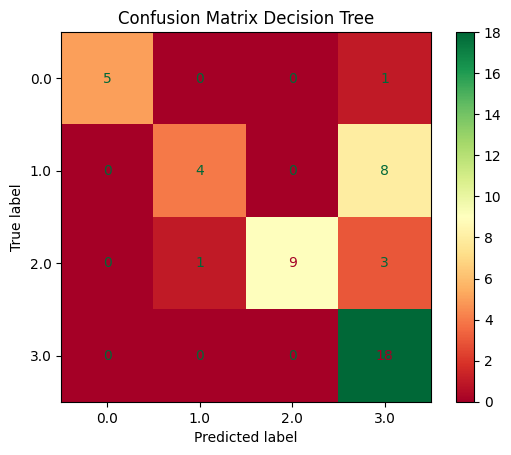

In [442]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
# use the built-in visualization function to generate a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='RdYlGn')
plt.title('Confusion Matrix Decision Tree')

plt.show()

In [452]:
score_tree = score_dict

In [443]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 4}

feature_importance_dict = {}
score_dict = {}

for tp in range(0,number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp[['endpoint clusters']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    model = XGBClassifier(**params, n_estimators=100, eta=0.1, max_depth=4)

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    score_dict[tp] = accuracy

    # Collect feature importances
    feature_importances = model.feature_importances_
    feature_names = X.columns

    feature_importance_dict[tp] = list(zip(feature_names, feature_importances))

    
score_dict

{0: 0.5918367346938775,
 1: 0.5918367346938775,
 2: 0.6122448979591837,
 3: 0.5510204081632653,
 4: 0.6326530612244898,
 5: 0.6122448979591837,
 6: 0.7142857142857143,
 7: 0.6530612244897959,
 8: 0.6122448979591837,
 9: 0.673469387755102,
 10: 0.6122448979591837,
 11: 0.6122448979591837,
 12: 0.6938775510204082,
 13: 0.8163265306122449,
 14: 0.7959183673469388,
 15: 0.8163265306122449,
 16: 0.8367346938775511,
 17: 0.7959183673469388,
 18: 0.8367346938775511,
 19: 0.7959183673469388,
 20: 0.8367346938775511,
 21: 0.8979591836734694,
 22: 0.8775510204081632}

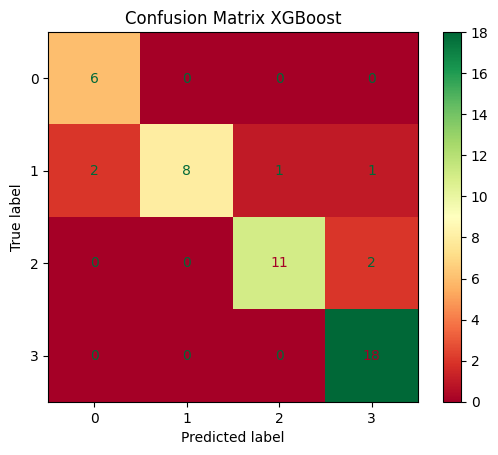

In [444]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# use the built-in visualization function to generate a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='RdYlGn')
plt.title('Confusion Matrix XGBoost')

plt.show()

In [454]:
score_xgboost =score_dict

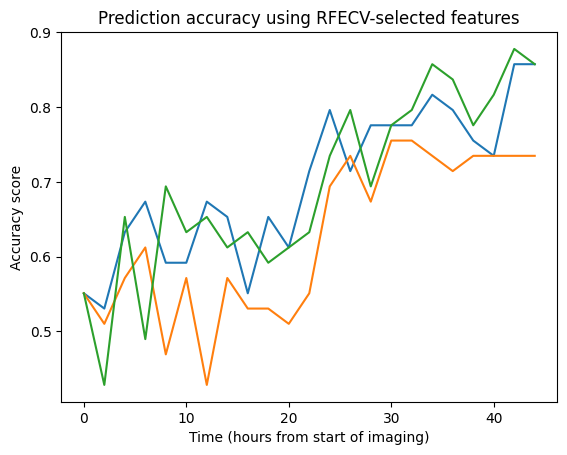

In [456]:
# Original timepoints
timepoints = list(score_logreg.keys())  # Assuming all dictionaries have the same keys

# Convert timepoints to hours
hours = [tp * 2 for tp in timepoints]

# First dictionary
x_axis1 = hours
y_axis1 = score_logreg.values()

# Second dictionary
x_axis2 = hours
y_axis2 = score_tree.values()

x_axis3 = hours
y_axis3 = score_xgboost.values()

# Plot values from the first dictionary
plt.plot(x_axis1, y_axis1, label='Logistic Regression')

# Plot values from the second dictionary
plt.plot(x_axis2, y_axis2, label='Decision Tree')

plt.plot(x_axis3, y_axis3, label='xgboost')



plt.title('Prediction accuracy using RFECV-selected features')
plt.xlabel('Time (hours from start of imaging)')
plt.ylabel('Accuracy score')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=1)
plt.show()


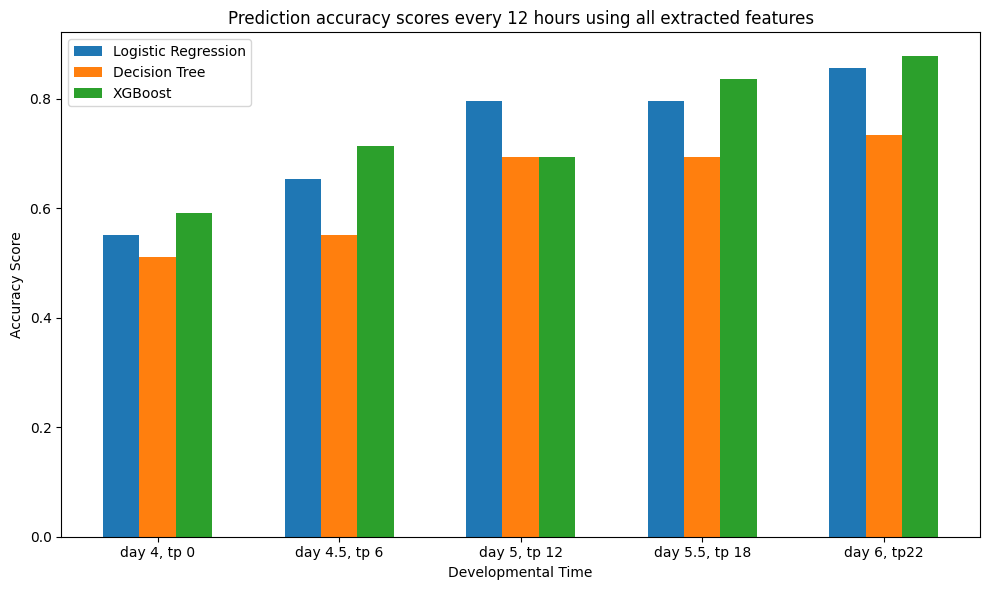

In [419]:
import matplotlib.pyplot as plt

# Define the timepoints of interest
timepoints_of_interest = [0, 6, 12, 18, 22]
timepoint_labels = ['day 4, tp 0', 'day 4.5, tp 6', 'day 5, tp 12', 'day 5.5, tp 18', 'day 6, tp22']

model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost']
accuracy_scores = [score_logreg, score_tree, score_xgboost]

# Initialize lists to store accuracy scores at timepoints of interest for each model
model1_scores = []
model2_scores = []
model3_scores = []

# Iterate over the timepoints of interest and extract accuracy scores for each model
for tp in timepoints_of_interest:
    model1_scores.append(score_logreg.get(tp, 0))
    model2_scores.append(score_tree.get(tp, 0))
    model3_scores.append(score_xgboost.get(tp, 0))

# Plot the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(timepoints_of_interest))

plt.bar(index, model1_scores, width=bar_width, label='Logistic Regression')
plt.bar([i + bar_width for i in index], model2_scores, width=bar_width, label='Decision Tree')
plt.bar([i + 2 * bar_width for i in index], model3_scores, width=bar_width, label='XGBoost')

plt.xlabel('Developmental Time')
plt.ylabel('Accuracy Score')
plt.title('Prediction accuracy scores every 12 hours using all extracted features')
plt.xticks([i + bar_width for i in index], timepoint_labels)
plt.legend()
plt.tight_layout()
plt.show()



Using PCs

In [334]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your DataFrame and 'number_timepoints' is defined

params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 4}
feature_importance_dict = {}
score_dict = {}

for tp in range(number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp['endpoint clusters']  # Drop unnecessary columns and get features and labels

    # Perform PCA
    pca = PCA(n_components=0.95)  # Choose the number of components to explain 95% of variance
    X_pca = pca.fit_transform(X)

    # Split the PCA-transformed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=1, stratify=y)

    model =  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    score_dict[tp] = accuracy
score_dict


{0: 0.5306122448979592,
 1: 0.3877551020408163,
 2: 0.5510204081632653,
 3: 0.5306122448979592,
 4: 0.673469387755102,
 5: 0.6530612244897959,
 6: 0.5918367346938775,
 7: 0.6122448979591837,
 8: 0.673469387755102,
 9: 0.6938775510204082,
 10: 0.673469387755102,
 11: 0.7142857142857143,
 12: 0.7959183673469388,
 13: 0.7755102040816326,
 14: 0.5714285714285714,
 15: 0.6530612244897959,
 16: 0.673469387755102,
 17: 0.7551020408163265,
 18: 0.8367346938775511,
 19: 0.7959183673469388,
 20: 0.7755102040816326,
 21: 0.8367346938775511,
 22: 0.9591836734693877}

In [328]:
score_PCA_logreg=score_dict

In [333]:
score_PCA_XGBoost=score_dict

In [335]:
score_PCA_DT=score_dict

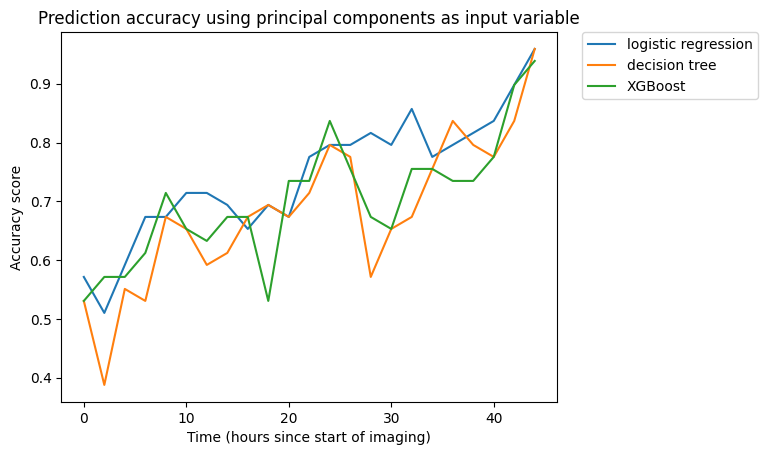

In [388]:
# Original timepoints
timepoints = list(score_PCA_XGBoost.keys())  # Assuming all dictionaries have the same keys

# Multiply each timepoint by 2 to represent hours since the start of imaging
renamed_timepoints = [tp * 2 for tp in timepoints]

# First dictionary
x_axis1 = renamed_timepoints  # Use renamed_timepoints instead of timepoints
y_axis1 = score_PCA_logreg.values()

x_axis2 = renamed_timepoints  # Use renamed_timepoints instead of timepoints
y_axis2 = score_PCA_DT.values()

x_axis3 = renamed_timepoints  # Use renamed_timepoints instead of timepoints
y_axis3 = score_PCA_XGBoost.values()

plt.plot(x_axis1, y_axis1, label='logistic regression')
plt.plot(x_axis2, y_axis2, label='decision tree')
plt.plot(x_axis3, y_axis3, label='XGBoost')

plt.title('Prediction accuracy using principal components as input variable')
plt.xlabel('Time (hours since start of imaging)')
plt.ylabel('Accuracy score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=1)
plt.show()


bar graph 

RFECV()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

score_dict = {}
number_timepoints = 23

for tp in range(0, number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp['endpoint clusters']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
    # Initialize logistic regression classifier
    classifier = LogisticRegression(random_state=0)

    # Initialize RFECV
    selector = RFECV(estimator=classifier, step=1, cv=5)

    # Fit RFECV
    selector = selector.fit(X_train, y_train)

    # Select features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Fit the classifier with selected features
    classifier.fit(X_train_selected, y_train)

    # Predict
    y_pred = classifier.predict(X_test_selected)

    # Calculate accuracy
    score = accuracy_score(y_test, y_pred)
    score_dict[tp] = score

score_dict


SelectKBest()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

score_dict = {}
selected_features_dict = {}
number_timepoints = 23
k = 5  # Number of top features to select

for tp in range(0, number_timepoints):
    df_tp = df[df['timepoint'] == tp]
    df_tp = df_tp.drop(['embryo ID', 'timepoint'], axis=1)
    X, y = df_tp.drop('endpoint clusters', axis=1), df_tp[['endpoint clusters']]
    
    # Perform feature selection
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_selected = selector.fit_transform(X, y.values.ravel())
    
    # Get the selected feature indices
    selected_indices = selector.get_support(indices=True)
    selected_features = X.columns[selected_indices]
    selected_features_dict[tp] = selected_features.tolist()
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=0)
   
    # Train the classifier
    classifier = XGBClassifier(**params, n_estimators=100, eta=0.1, max_depth=4)
    # Train Decision Tree Classifer
    classifier.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    score_dict[tp] = score  

# Print selected features for each timepoint
for tp, features in selected_features_dict.items():
    print(f"Timepoint {tp}: {features}")



